## Importando as bibliotecas e a base

# Superstore

** Contexto:** A análise de série temporal lida com dados baseados em séries temporais para extrair padrões de previsões e outras características dos dados. Ele utiliza um modelo para prever valores futuros em um pequeno período de tempo com base em observações anteriores. É amplamente utilizado para dados não estacionários, como dados econômicos, dados meteorológicos, preços de ações e previsões de vendas no varejo.


** O que queremos responder?**

    * Como foi a vendas nesse período?
    * Qual foi a cetegoria mais vendidas?
    * Qual foi o item mais vendido?




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import datetime as dt

In [2]:
df = pd.read_csv("Superstore Sales Dataset.csv")

## Analise exploratória dos dados

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

##### Através do info observei que precisaremos fazer um tratamento nas colunas Order Date e Ship Date para datetime. Além disso, precisaremos entender os valores nulos da coluna Postal Code.

In [5]:
# Verificar as colunas ausentes

df.loc[df["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


##### Caso fosse necessário criaria uma API para preenchimento automático caso estivesse faltando, como é um projeto simples e só está faltando os dados de Vermont, resolvi preencher com o CEP 05401. Esse código busquei no google.

In [6]:
# preencho os valores nulos com 5401
df.loc[df["Postal Code"].isnull(), "Postal Code"] = 5401

In [7]:
# confiro se os dadosforam alterados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True, format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], dayfirst=True, format="%d/%m/%Y")

In [9]:
# crio uma coluna ano

df["Year"] = df["Order Date"].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [11]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


### Vendas por ano

##### Como estamos trabalhando com 4 anos, optei em utilizar agrupar sa vendas por ano

In [12]:
df_anoagrupado = df.groupby("Year")["Sales"].sum()

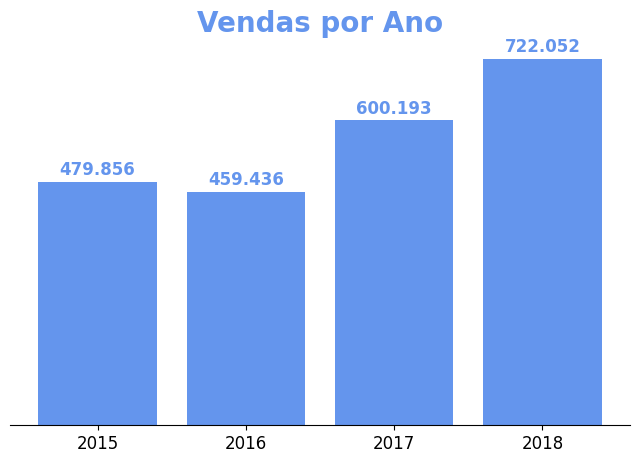

In [13]:
df_anoagrupado = df.groupby("Year")["Sales"].sum()

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(df_anoagrupado.index, df_anoagrupado.values, color="#6495ED", linewidth=2.0)

ax.set_title("Vendas por Ano", fontsize=20, fontweight="bold", color="#6495ED")

ax.xaxis.set_ticks([2015, 2016, 2017, 2018])
ax.tick_params(axis="x", labelsize=12)

for i in range(0, 4):
    ax.annotate(
        "{:,.0f}".format(df_anoagrupado.values[i]).replace(",", "."),
        (df_anoagrupado.index[i], df_anoagrupado.values[i]),
        ha="center",
        xytext=(0, 5),
        textcoords="offset points",
        fontsize=12,
        color="#6495ED",
        fontweight="bold",
    )


ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.show()

### Venda por mês

In [14]:
# Criando uma coluna com o mês

df["Month"] = df["Order Date"].dt.month

In [15]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


In [16]:
# Fazendo o groupby por mês e ano

df_mes_agrupado = df.groupby(["Month", "Year"])["Sales"].sum()

In [17]:
# transformando os índices em colunas

df_mes_agrupado = df_mes_agrupado.reset_index()

df_mes_agrupado.head()

,Month,Year,Sales
0,1,2015,14205.7070
1,1,2016,18066.9576
2,1,2017,18542.4910
3,1,2018,43476.4740
4,2,2015,4519.8920


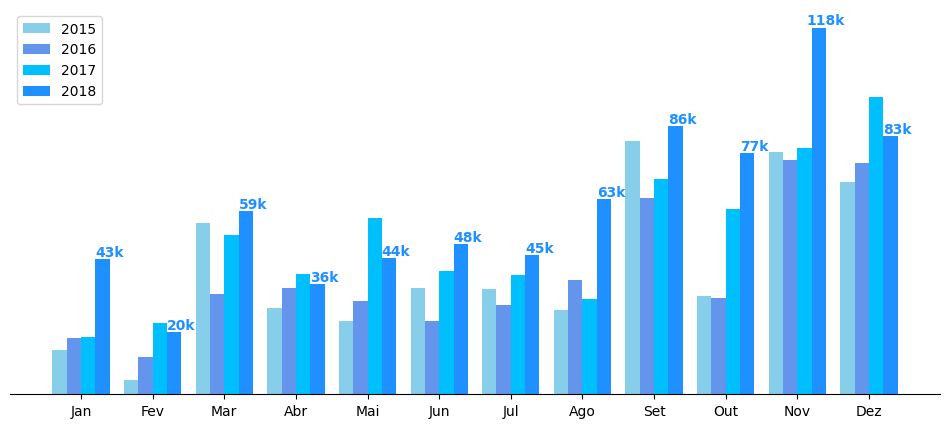

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))

wid = 0.20

ax.bar(
    df_mes_agrupado[df_mes_agrupado.Year == 2015].Month.values
    - wid
    - wid / 2,  # <-deslocando a barra para esquerda
    df_mes_agrupado[df_mes_agrupado.Year == 2015].Sales.values,
    color="#87CEEB",
    label=2015,
    width=wid,
)

ax.bar(
    df_mes_agrupado[df_mes_agrupado.Year == 2016].Month.values
    - wid / 2,  # <-deslocando a barra para esquerda
    df_mes_agrupado[df_mes_agrupado.Year == 2016].Sales.values,
    color="#6495ED",
    label=2016,
    width=wid,
)

ax.bar(
    df_mes_agrupado[df_mes_agrupado.Year == 2017].Month.values
    + wid / 2,  # <-deslocando a barra para esquerda
    df_mes_agrupado[df_mes_agrupado.Year == 2017].Sales.values,
    color="#00BFFF",
    label=2017,
    width=wid,
)

ax.bar(
    df_mes_agrupado[df_mes_agrupado.Year == 2018].Month.values
    + wid
    + wid / 2,  # <-deslocando a barra para esquerda
    df_mes_agrupado[df_mes_agrupado.Year == 2018].Sales.values,
    color="#1E90FF",
    label=2018,
    width=wid,
)

ax.legend()


for i in range(0, 12):
    ax.annotate(
        "{:,.0f}k".format(
            df_mes_agrupado[df_mes_agrupado.Year == 2018].Sales.values[i] / 1000
        ).replace(
            ",", "."
        ),  # Valores que vão ser mostrados
        (
            df_mes_agrupado[df_mes_agrupado.Year == 2018].Month.values[i]
            + wid
            + wid / 2,
            df_mes_agrupado[df_mes_agrupado.Year == 2018].Sales.values[i],
        ),  # Posição
        ha="center",  # Alinha horizontal do texto
        va="top",  # Alinhamento vertical
        xytext=(5, 10),  # Deslocamento em relação ao ponto que o texsto estaria
        textcoords="offset points",  # Sistema de coordenadas que o xtexto vai ter como referência
        fontsize=10,  # tamanho fonte
        color="#1E90FF",
        fontweight="bold",  # espessura da fonte
    )

ax.set_yticks(
    np.array([0, 90000])
)  # Diminuindo o tamanho da barra para não cortar o rótulo
ax.yaxis.set_visible(False)  # Retirando os valores do eixo y

ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)


ax.xaxis.set_ticks(np.arange(1, 13))  # ajustando o valor de x
ax.set_xticklabels(
    ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]
)  # Adicionando os rotulos
ax.tick_params(axis="x", labelsize=10)

plt.show()

### Qual foi a categoria mais vendida?

In [19]:
df_categoria = df.groupby(["Category", "Year"])["Sales"].sum().round(2)
df_categoria = df_categoria.reset_index()

In [20]:
df_categoria.Category

0           Furniture
1           Furniture
2           Furniture
3           Furniture
4     Office Supplies
5     Office Supplies
6     Office Supplies
7     Office Supplies
8          Technology
9          Technology
10         Technology
11         Technology
Name: Category, dtype: object

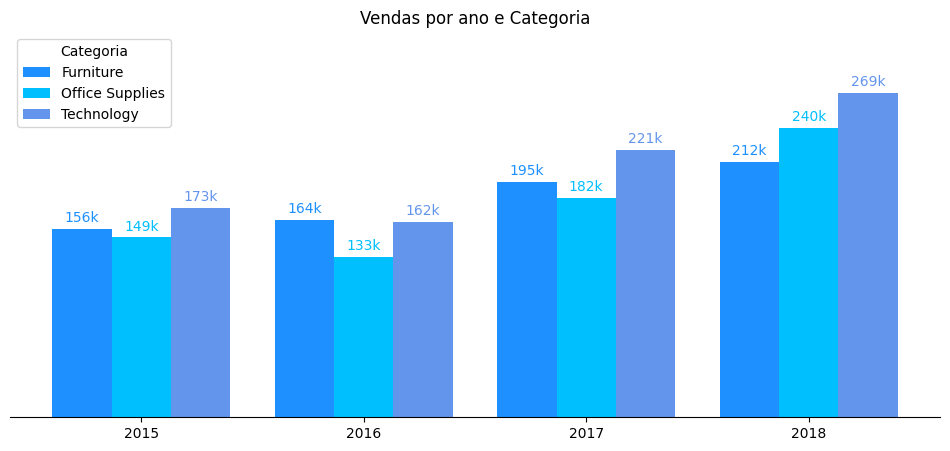

In [21]:
# Criar figura e eixo
fig, ax = plt.subplots(figsize=(12, 5))

# Número total de colunas
num_cols = len(df_categoria["Category"].unique())

# Calcular a largura das barras
wid = 0.8 / num_cols

# Lista de cores
colors = ["#1E90FF", "#00BFFF", "#6495ED"]

# Agrupar por 'Category' e iterar sobre os grupos
for i, (name, group) in enumerate(df_categoria.groupby("Category")):
    # Calcular a posição x para as barras do grupo
    x_pos = group["Year"] + wid * i - 0.5 * wid * (num_cols - 1)

    ax.bar(
        x_pos,
        group["Sales"],
        label=name,
        color=colors[
            i % len(colors)
        ],  # Usar módulo para evitar índices fora do alcance
        width=wid,
    )

    # Adicionar rótulos às barras
    for x, y in zip(x_pos, group["Sales"]):
        # Extrair os três primeiros digitos de "y"
        y_str = str(y)[:3]
        ax.annotate(
            f"{y_str}k",
            (x, y),
            textcoords="offset points",
            xytext=(0, 5),
            ha="center",
            color=colors[i % len(colors)],
        )


# Adicionar legendas e rótulos
ax.legend(title="Categoria")
ax.set_title("Vendas por ano e Categoria")

# Ajustar rótulos do eixo x
ax.set_xticks(df_categoria["Year"].unique())

ax.set_yticks(
    np.array([0, 320000])
)  # Diminuindo o tamanho da barra para não cortar o rótulo

ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

# Mostrar o gráfico
plt.show()

In [47]:
# Definindo a cor base
base_color = mcolors.hex2color("#1E90FF")

# Criando uma paleta de cores com um gradiente
colors = [
    mcolors.rgb2hex((base_color[0], base_color[1], base_color[2] * (i / n)))
    for i in range(n)
]

# Criando o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(16, 9))
bars = ax.barh(
    top_n_itens["Product Name"].values,
    top_n_itens["Sales"].values,
    align="center",
    color=colors,
)

ax.invert_yaxis()

for i in range(0, n):
    # Adicionando anotação com o valor de vendas formatado
    ax.annotate(
        "{:,.0f}k".format(top_n_itens["Sales"].iloc[i] / 1000).replace(",", "."),
        (top_n_itens["Sales"].iloc[i], top_n_itens["Product Name"].iloc[i]),
        ha="center",
        xytext=(-15, -2),
        textcoords="offset points",
        fontsize=11,
        color="#FFFFFF",
        fontweight="bold",
    )

ax.xaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Adicionando uma barra de cores para representar o gradiente
cbar = fig.colorbar(
    mcolors.LinearSegmentedColormap.from_list("custom", colors, n=len(colors)),
    ax=ax,
    aspect=50,
    pad=0.01,
)
cbar.set_label("Sales", rotation=270, labelpad=15)

plt.show()

NameError: name 'mcolors' is not defined

### Qual o item mais vendido?

In [22]:
df["Product Name"].nunique()

1849

Temos uma grande quantidade de ítens vendidos, graficamente fica muito ruim para visualizar. Então irei ver uma melhor forma de criar os 15 melhores ítens.

In [23]:
df_itens = df.groupby("Product Name")["Sales"].sum().round(2)
df_itens = df_itens.reset_index()
df_itens = df_itens.sort_values("Sales", ascending=False)
df_itens.head()

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.82
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
444,Cisco TelePresence System EX90 Videoconferenci...,22638.48
785,HON 5400 Series Task Chairs for Big and Tall,21870.58
685,GBC DocuBind TL300 Electric Binding System,19823.48


In [24]:
# Definindo o top n itens

n = 15

top_n_itens = df_itens.head(n)
top_n_itens

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.82
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38
444,Cisco TelePresence System EX90 Videoconferenci...,22638.48
785,HON 5400 Series Task Chairs for Big and Tall,21870.58
685,GBC DocuBind TL300 Electric Binding System,19823.48
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.50
804,Hewlett Packard LaserJet 3310 Copier,18839.69
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.90
682,GBC DocuBind P400 Electric Binding System,17965.07
812,High Speed Automatic Electric Letter Opener,17030.31


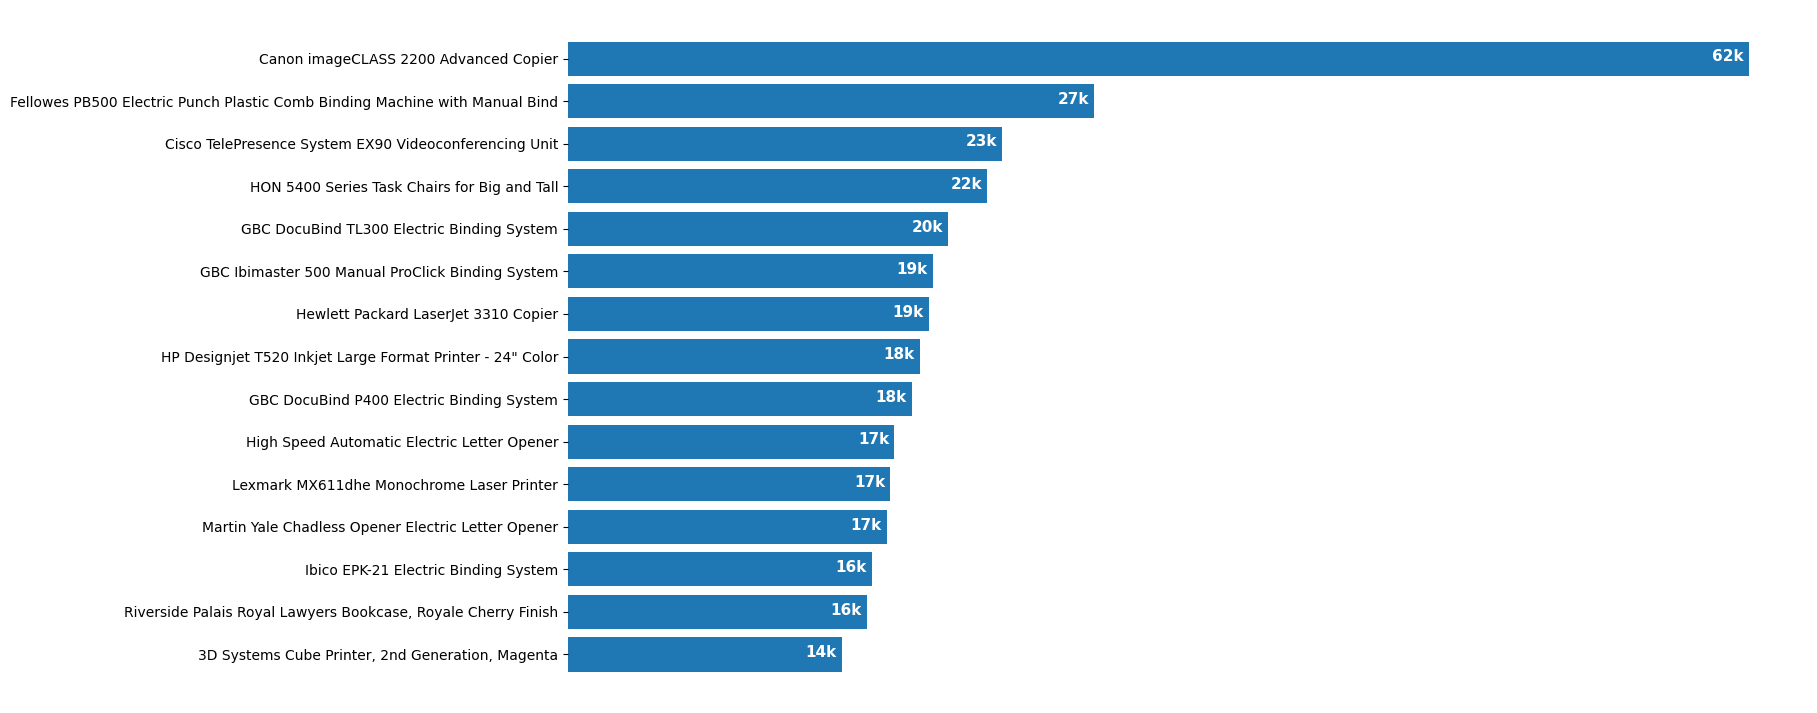

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))


ax.barh(
    top_n_itens["Product Name"].values,  # valores de y
    top_n_itens["Sales"].values,  # Valores de x
    align="center",
)

ax.invert_yaxis()  # Inverter o exixo , deixando do maior para o menor

for i in range(0, n):
    # Adicionar anotação com o valor de vendas formatado
    ax.annotate(
        "{:,.0f}k".format(top_n_itens["Sales"].iloc[i] / 1000).replace(",", "."),
        # Coordenadas para a anotação (sales, product name)
        (top_n_itens["Sales"].iloc[i], top_n_itens["Product Name"].iloc[i]),
        ha="center",  # Ajustar a posição horizontal da anotação
        xytext=(-15, -2),  # Deslocamento da anotação em relação ao ponto
        textcoords="offset points",  # Tipo de coordenadas do deslocamento
        fontsize=11,  # Tamanho da fonte da anotação
        color="#FFFFFF",  # Cor do texto da anotação
        fontweight="bold",  # Peso da fonte da anotação
    )

ax.xaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
plt.show()

In [26]:
df_ano = pd.DataFrame(df.Year.unique(), columns=["Year"])

In [27]:
# Podemos fazer um groupby de item e ano
itens_ano = df.groupby(["Product Name", "Year"])["Sales"].sum()
itens_ano = itens_ano.reset_index()
itens_ano

,Product Name,Year,Sales
0,"""While you Were Out"" Message Book, One Form pe...",2018,25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",2016,6.608
2,"#10 Gummed Flap White Envelopes, 100/Box",2017,24.780
3,"#10 Gummed Flap White Envelopes, 100/Box",2018,9.912
4,#10 Self-Seal White Envelopes,2017,86.502
...,...,...,...
5269,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,2018,205.086
5270,netTALK DUO VoIP Telephone Service,2015,335.936
5271,netTALK DUO VoIP Telephone Service,2016,230.956
5272,netTALK DUO VoIP Telephone Service,2017,377.928


In [28]:
top_n_itens["união"] = "unir"

df_ano["união"] = "unir"

C:\Users\Clfer\AppData\Local\Temp\ipykernel_24948\1872761441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_n_itens["união"] = "unir"


In [29]:
df_ano

,Year,união
0,2017,unir
1,2016,unir
2,2015,unir
3,2018,unir


In [30]:
df_produto_ano = pd.merge(top_n_itens, df_ano, how="outer", on="união")

In [31]:
df_produto_ano

,Product Name,Sales,união,Year
0,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2017
1,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2016
2,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2015
3,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2018
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2017
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2016
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2015
7,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2018
8,Cisco TelePresence System EX90 Videoconferenci...,22638.48,unir,2017
9,Cisco TelePresence System EX90 Videoconferenci...,22638.48,unir,2016


In [32]:
df_top_product = pd.merge(
    df_produto_ano,
    itens_ano[["Product Name", "Sales", "Year"]],
    how="left",
    on=["Product Name", "Year"],
)

In [33]:
df_top_product

,Product Name,Sales_x,união,Year,Sales_y
0,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2017,25899.9260
1,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2016,NaN
2,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2015,NaN
3,Canon imageCLASS 2200 Advanced Copier,61599.82,unir,2018,35699.8980
4,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2017,2287.7820
5,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2016,15760.2760
6,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2015,2033.5840
7,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir,2018,7371.7420
8,Cisco TelePresence System EX90 Videoconferenci...,22638.48,unir,2017,NaN
9,Cisco TelePresence System EX90 Videoconferenci...,22638.48,unir,2016,NaN


In [43]:
# Definindo o top n itens
n = 10
top_n_itens = top_n_itens.head(n)
top_n_itens

,Product Name,Sales,união
404,Canon imageCLASS 2200 Advanced Copier,61599.82,unir
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,unir
444,Cisco TelePresence System EX90 Videoconferenci...,22638.48,unir
785,HON 5400 Series Task Chairs for Big and Tall,21870.58,unir
685,GBC DocuBind TL300 Electric Binding System,19823.48,unir
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.50,unir
804,Hewlett Packard LaserJet 3310 Copier,18839.69,unir
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.90,unir
682,GBC DocuBind P400 Electric Binding System,17965.07,unir
812,High Speed Automatic Electric Letter Opener,17030.31,unir


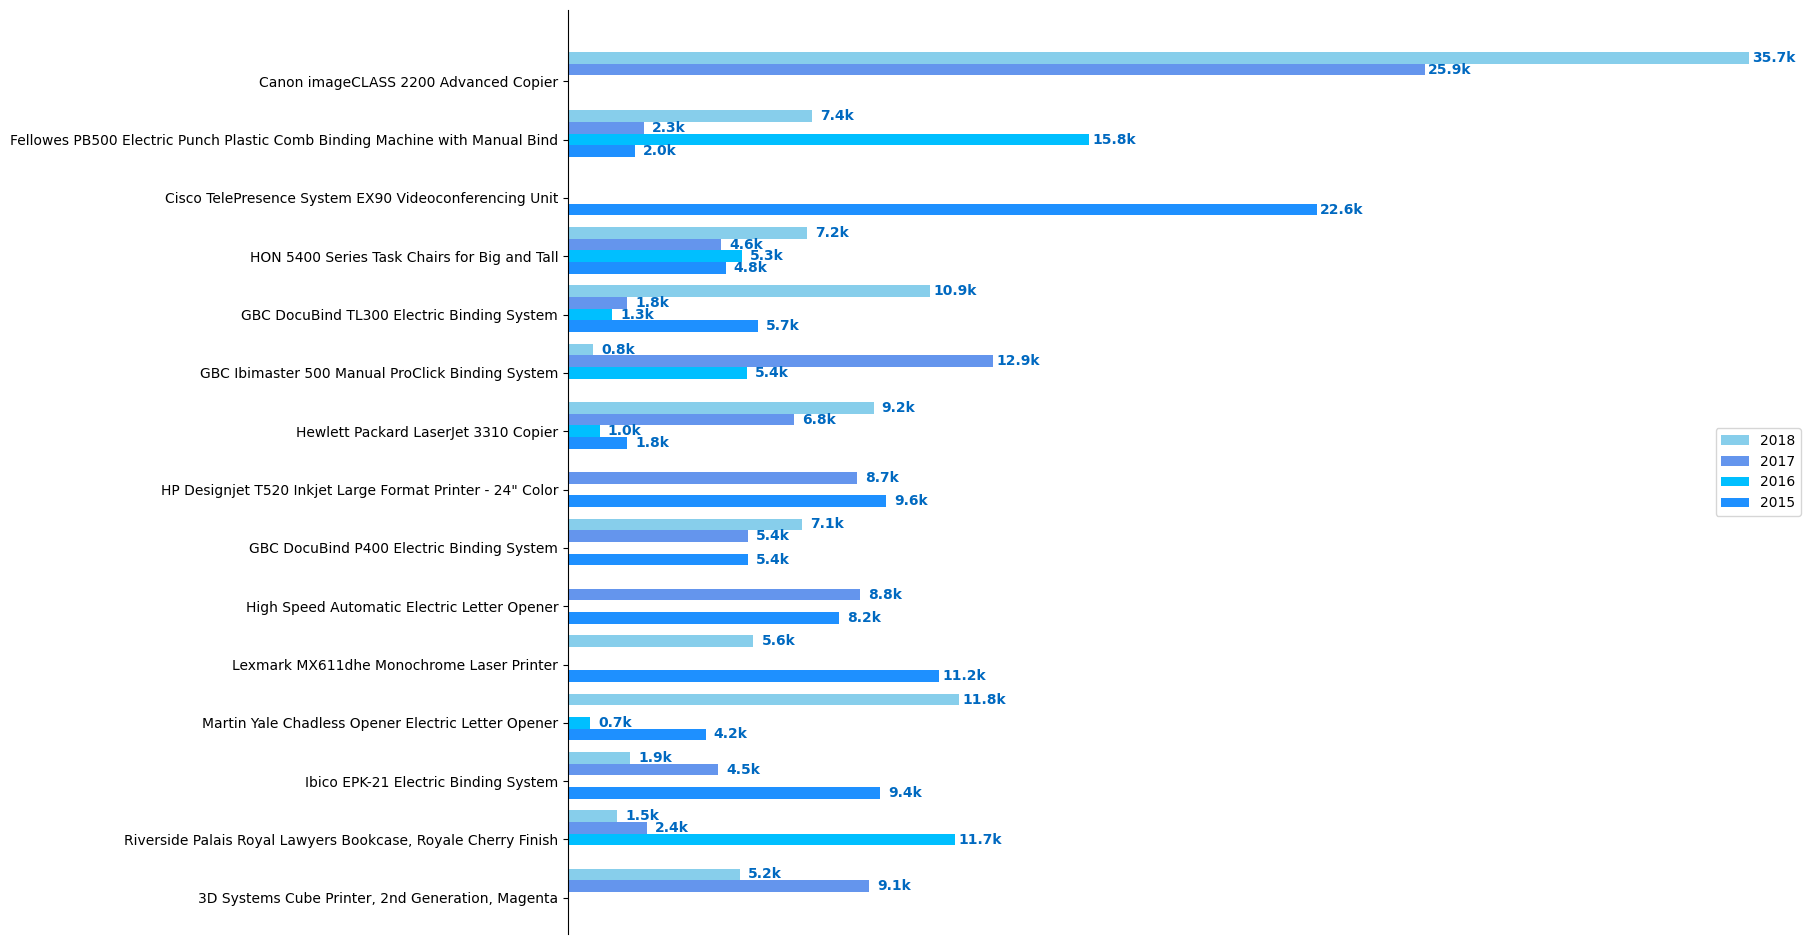

In [45]:
fig, ax = plt.subplots(figsize=(16, 12))

hgt = 0.2

qtd_itens = len(top_n_itens)

# Iterar sobre os anos
for i, year in enumerate([2018, 2017, 2016, 2015]):
    # Calcular a posição y para as barras do ano atual
    y_pos = np.arange(0, qtd_itens) - hgt * (2 - i)  # Ajuste para centralizar as barras

    ax.barh(
        y_pos,
        df_top_product[df_top_product.Year == year].Sales_y.values,  # Valores de x
        align="center",
        height=hgt,  # Comprimento do gráfico
        label=str(year),
        color="#87CEEB"
        if year == 2018
        else "#6495ED"
        if year == 2017
        else "#00BFFF"
        if year == 2016
        else "#1E90FF",
    )

    # Adicionar anotações para cada barra
    for j, value in enumerate(
        df_top_product[df_top_product.Year == year].Sales_y.values
    ):
        x_text = 18  # Ajuste para posicionar o texto à direita ou à esquerda
        ax.annotate(
            "{:,.1f}k".format(value / 1000),
            (value, y_pos[j]),
            textcoords="offset points",
            xytext=(x_text, 0),
            ha="center" if i % 2 == 0 else "center",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="#0069c0",
        )

# Adicionar rótulos e ajustar o layout
ax.yaxis.set_ticks(np.arange(0, qtd_itens))
ax.set_yticklabels(top_n_itens["Product Name"])
ax.tick_params(axis="y", labelsize=10)
ax.invert_yaxis()  # Inverter o eixo y (deixando o gráfico do maior para o menor)
ax.legend()

ax.xaxis.set_visible(False)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Mostrar o gráfico
plt.show()